In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/supply_chain_data.csv")

In [3]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


DATA CLEANING

In [4]:
df.shape

(100, 24)

In [5]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [7]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


EXPLORATORY DATA ANALYSIS

In [8]:
num_col=[]
cat_col=[]

In [9]:
for column in df.columns:
  if df[column].dtype=='O':
    cat_col.append(column)
  else:
    num_col.append(column)

In [10]:
cat_col

['Product type',
 'SKU',
 'Customer demographics',
 'Shipping carriers',
 'Supplier name',
 'Location',
 'Inspection results',
 'Transportation modes',
 'Routes']

In [11]:
num_col

['Price',
 'Availability',
 'Number of products sold',
 'Revenue generated',
 'Stock levels',
 'Lead times',
 'Order quantities',
 'Shipping times',
 'Shipping costs',
 'Lead time',
 'Production volumes',
 'Manufacturing lead time',
 'Manufacturing costs',
 'Defect rates',
 'Costs']

UNIVARIATE ANALYSIS

<Axes: ylabel='Frequency'>

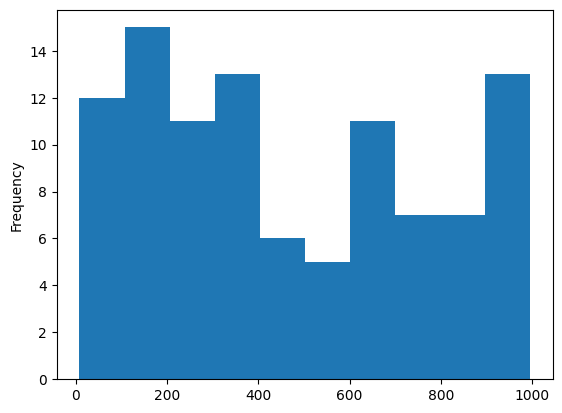

In [12]:
df['Number of products sold'].plot(kind='hist')

<Axes: ylabel='Number of products sold'>

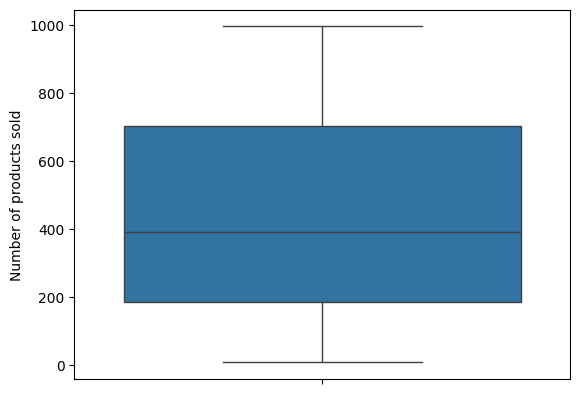

In [13]:
sns.boxplot(df['Number of products sold'])

<Axes: ylabel='Density'>

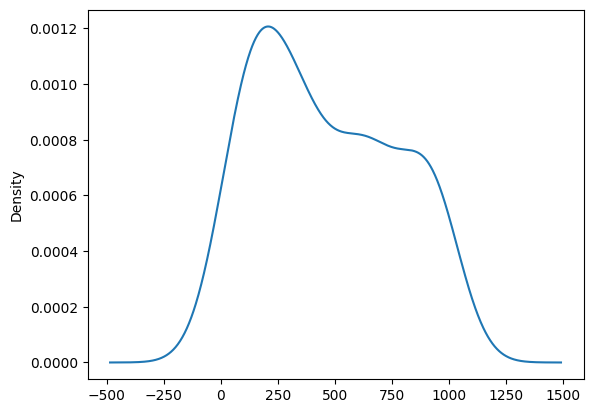

In [14]:
df['Number of products sold'].plot(kind='kde')

In [15]:
df['Number of products sold'].skew()

0.28141802310116754

<Axes: xlabel='Revenue generated', ylabel='Count'>

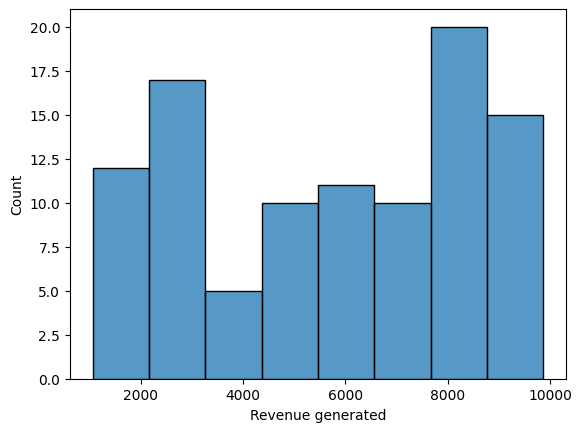

In [17]:
sns.histplot(df['Revenue generated'])

<Axes: ylabel='Density'>

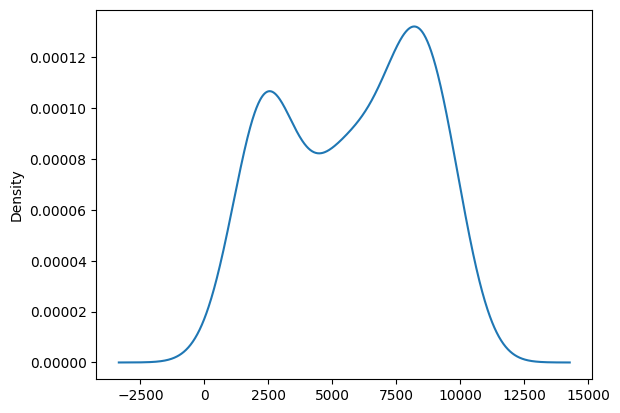

In [18]:
df['Revenue generated'].plot(kind='kde')

In [19]:
df['Revenue generated'].skew()

-0.17382938681198085

<Axes: ylabel='Revenue generated'>

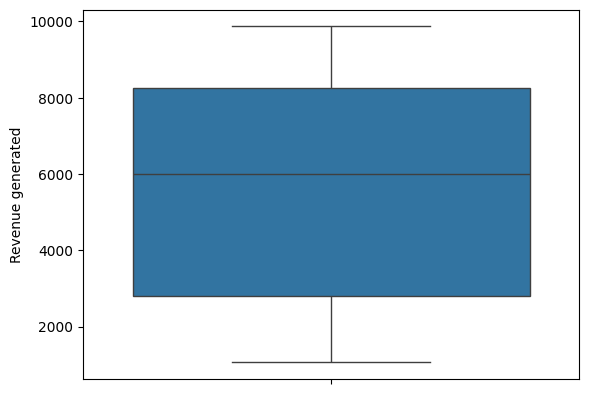

In [20]:
sns.boxplot(df['Revenue generated'])

<Axes: ylabel='Frequency'>

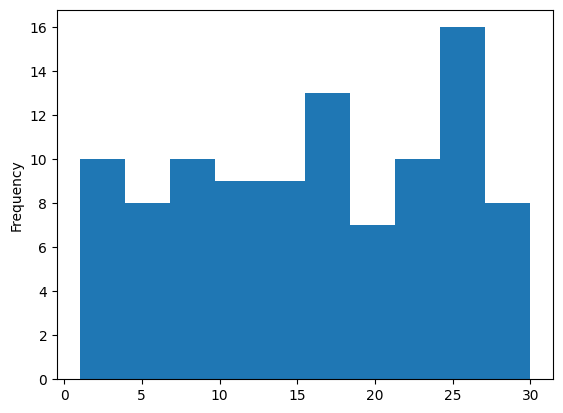

In [78]:
df["Lead times"].plot(kind='hist')

In [79]:
df["Lead times"].skew()

-0.1298385433492701

In [80]:
df["Lead times"].kurtosis()

-1.1888487531099592

<Axes: >

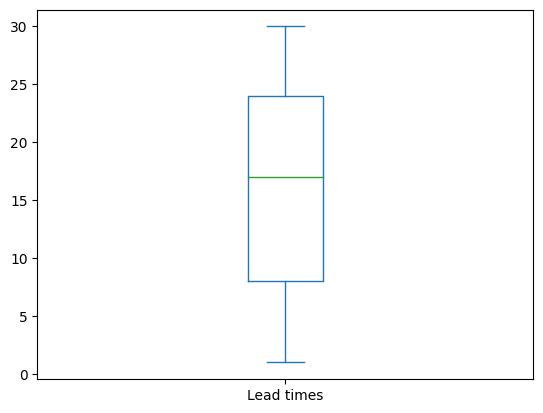

In [81]:
df["Lead times"].plot(kind="box")

<Axes: ylabel='Frequency'>

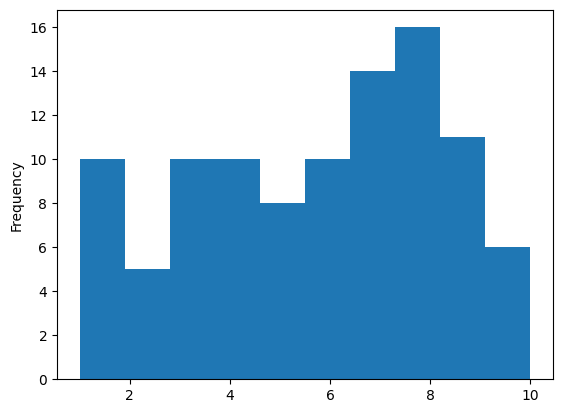

In [22]:
df['Shipping times'].plot(kind='hist')

<Axes: ylabel='Density'>

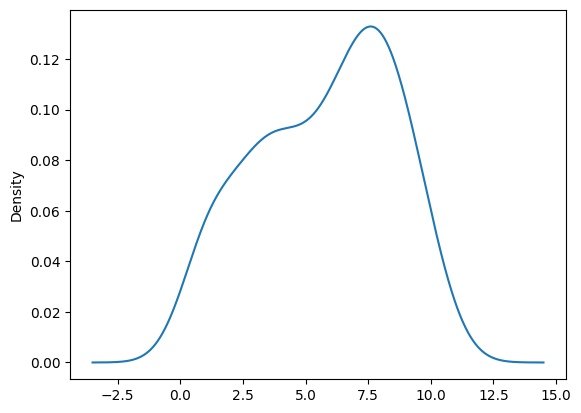

In [23]:
df['Shipping times'].plot(kind='kde')

In [24]:
df['Shipping times'].skew()

-0.2815892973154485

<Axes: >

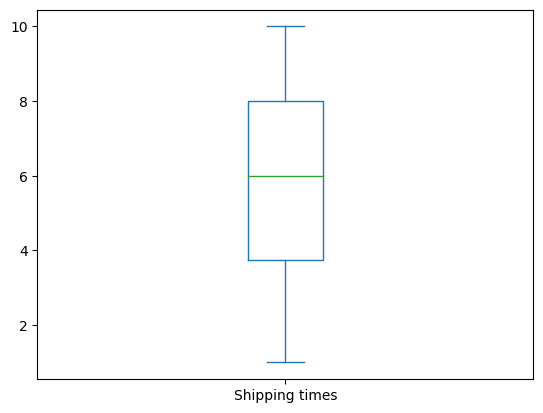

In [25]:
df['Shipping times'].plot(kind='box')

<Axes: ylabel='Frequency'>

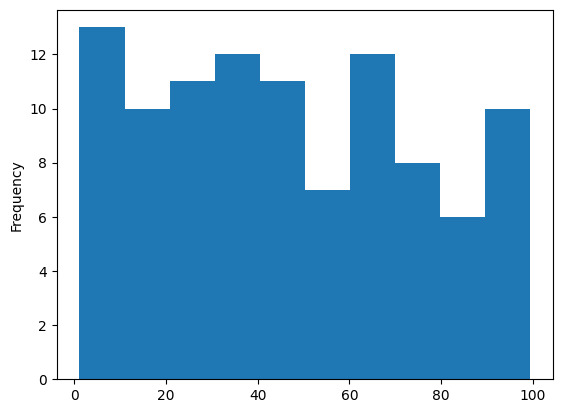

In [27]:
df['Manufacturing costs'].plot(kind='hist')

<Axes: ylabel='Density'>

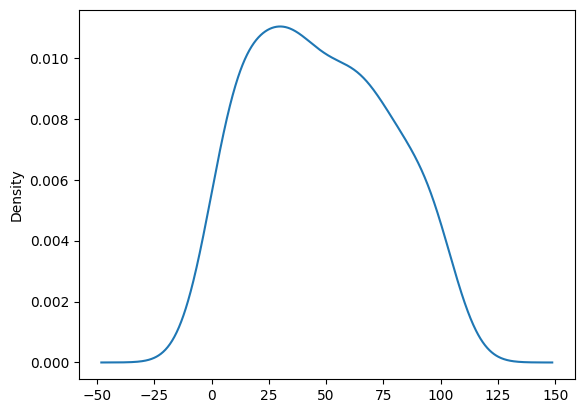

In [28]:
df['Manufacturing costs'].plot(kind='kde')

In [29]:
df['Manufacturing costs'].skew()

0.19149768532914263

<Axes: >

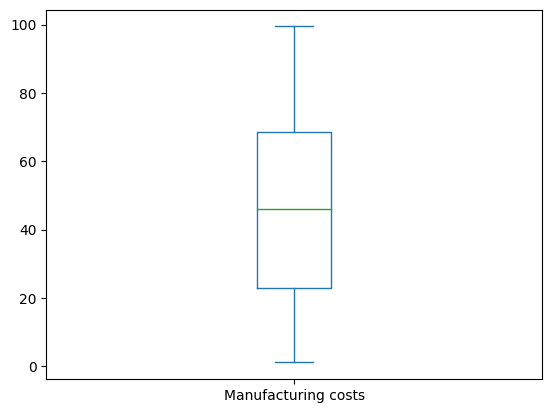

In [30]:
df['Manufacturing costs'].plot(kind='box')

In [31]:
df['Transportation modes'].value_counts()

Transportation modes
Road    29
Rail    28
Air     26
Sea     17
Name: count, dtype: int64

<Axes: xlabel='Transportation modes', ylabel='Defect rates'>

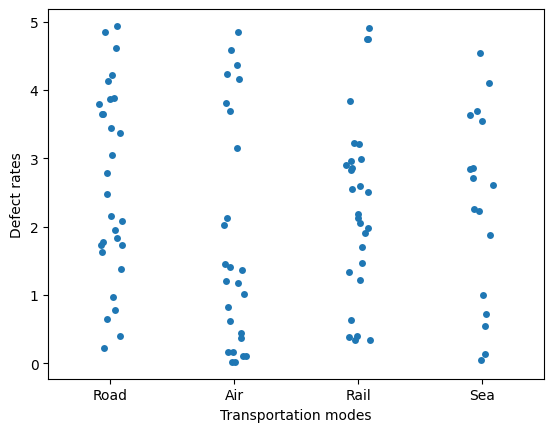

In [32]:
sns.stripplot(x=df['Transportation modes'], y=df['Defect rates'])

Bivariate Analysis

<Axes: xlabel='Revenue generated', ylabel='Manufacturing costs'>

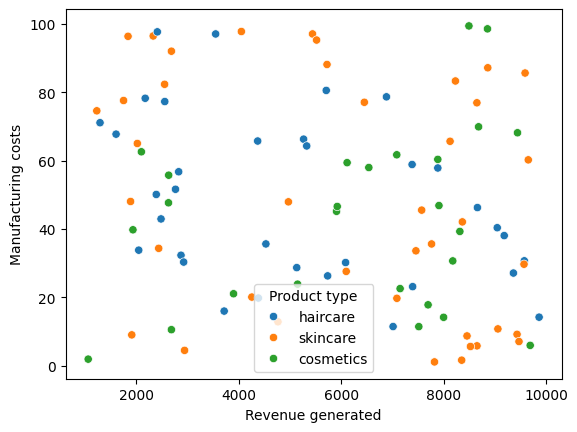

In [66]:
sns.scatterplot(x=df['Revenue generated'], y=df['Manufacturing costs'], hue=df['Product type'])

<Axes: xlabel='Product type', ylabel='Manufacturing costs'>

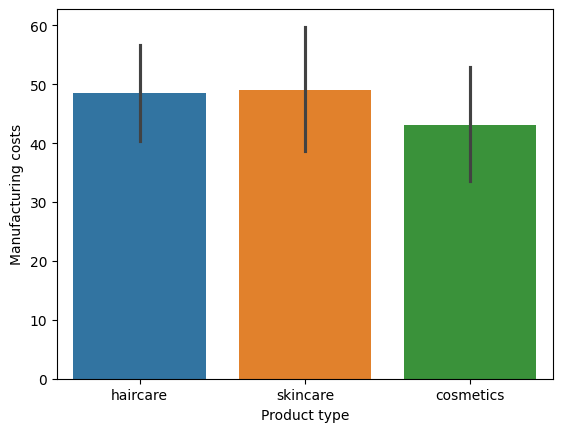

In [67]:
sns.barplot(x=df['Product type'], y=df['Manufacturing costs'], hue=df['Product type'])

<Axes: xlabel='Revenue generated', ylabel='Location'>

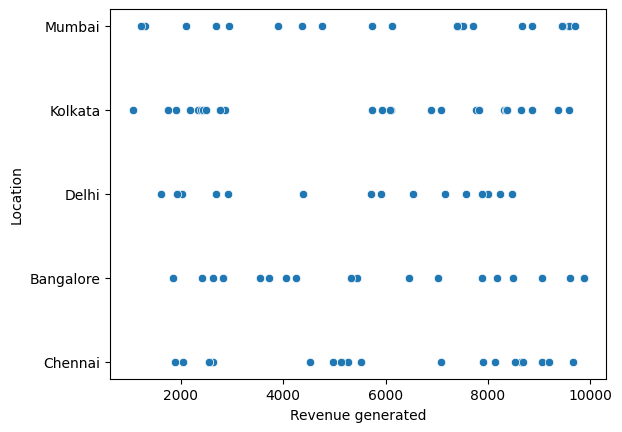

In [34]:
sns.scatterplot(x=df['Revenue generated'], y=df['Location'])

In [35]:
pd.crosstab(df['Location'], df['Transportation modes'], normalize='columns')*100

Transportation modes,Air,Rail,Road,Sea
Location,,,,
Bangalore,11.538462,17.857143,27.586207,11.764706
Chennai,23.076923,17.857143,17.241379,23.529412
Delhi,15.384615,28.571429,3.448276,11.764706
Kolkata,23.076923,21.428571,34.482759,17.647059
Mumbai,26.923077,14.285714,17.241379,35.294118


<Axes: xlabel='Transportation modes', ylabel='Location'>

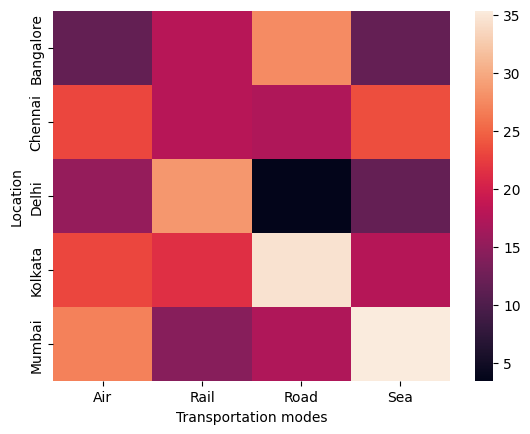

In [36]:
sns.heatmap(pd.crosstab(df['Location'],df['Transportation modes'], normalize='columns')*100)

In [37]:
pd.crosstab(df['Location'], df['Routes'], normalize='columns')*100

Routes,Route A,Route B,Route C
Location,,,
Bangalore,25.581395,10.810811,15.0
Chennai,13.953488,24.324324,25.0
Delhi,11.627907,18.918919,15.0
Kolkata,30.232558,24.324324,15.0
Mumbai,18.604651,21.621622,30.0


<Axes: xlabel='Routes', ylabel='Location'>

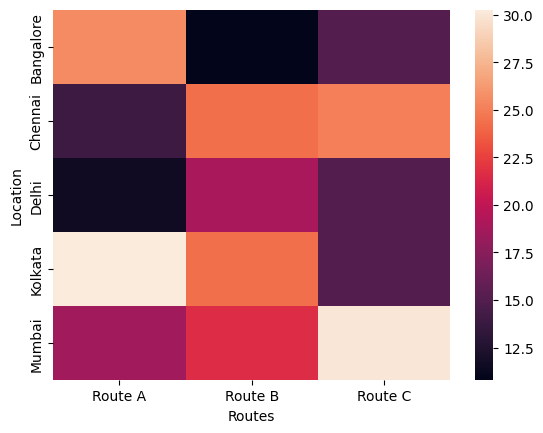

In [38]:
sns.heatmap(pd.crosstab(df['Location'],df['Routes'], normalize='columns')*100)

In [75]:
pd.crosstab(df['Supplier name'], df['Shipping carriers'], normalize='columns')*100

Shipping carriers,Carrier A,Carrier B,Carrier C
Supplier name,,,
Supplier 1,14.285714,37.209302,24.137931
Supplier 2,32.142857,18.604651,17.241379
Supplier 3,17.857143,13.953488,13.793103
Supplier 4,17.857143,18.604651,17.241379
Supplier 5,17.857143,11.627907,27.586207


<Axes: xlabel='Shipping carriers', ylabel='Supplier name'>

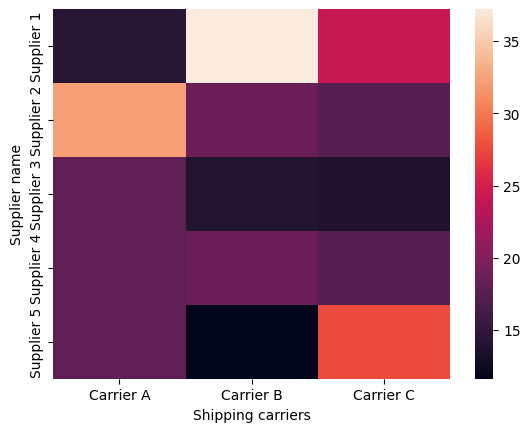

In [76]:
sns.heatmap(pd.crosstab(df['Supplier name'], df['Shipping carriers'], normalize='columns')*100)

In [40]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


<Axes: xlabel='Product type', ylabel='Number of products sold'>

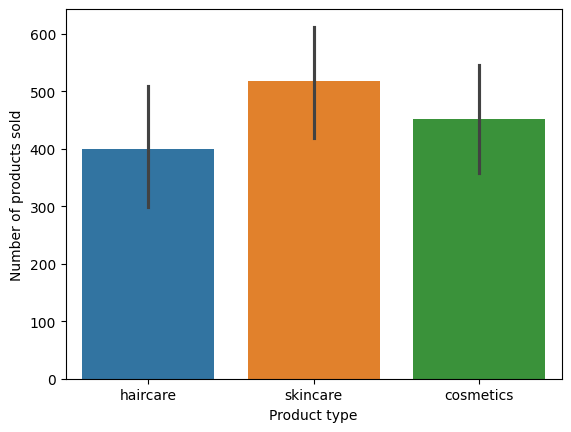

In [63]:
sns.barplot(y=df['Number of products sold'], x=df['Product type'],hue=df["Product type"])

<Axes: xlabel='Product type', ylabel='Revenue generated'>

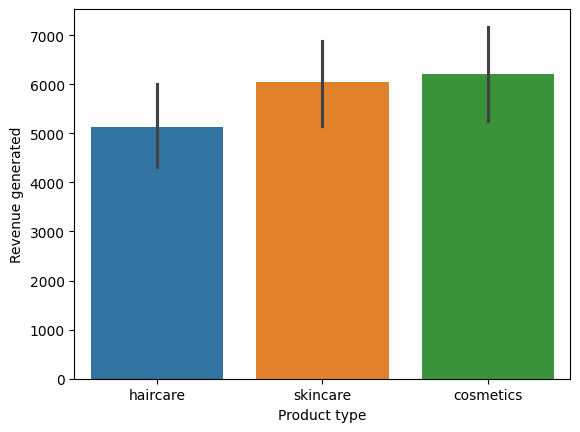

In [62]:
sns.barplot(y=df['Revenue generated'], x=df['Product type'],hue=df["Product type"])

<Axes: xlabel='Location', ylabel='Number of products sold'>

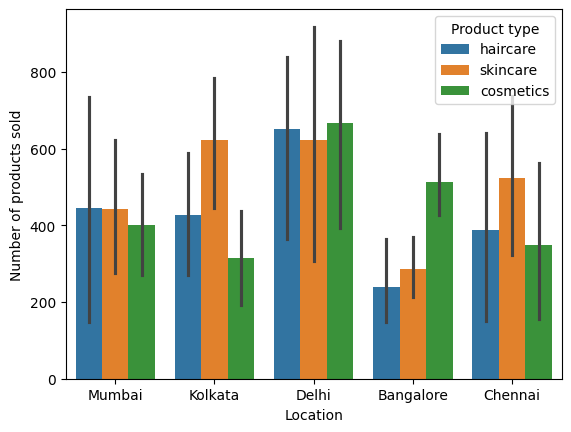

In [59]:
sns.barplot(y=df['Number of products sold'], x=df['Location'], hue=df['Product type'])

<Axes: xlabel='Product type', ylabel='Number of products sold'>

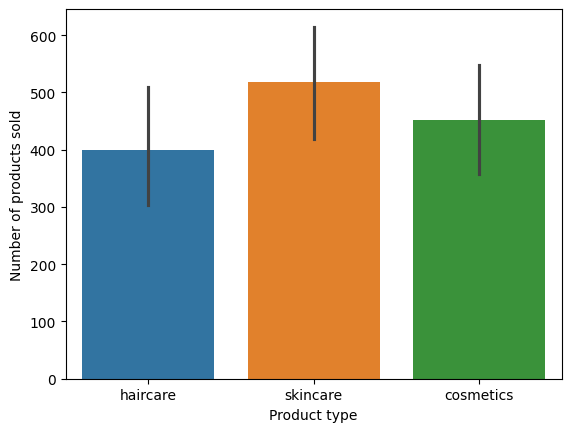

In [60]:
sns.barplot(y=df['Number of products sold'], x=df['Product type'], hue=df["Product type"])

<Axes: xlabel='Defect rates', ylabel='Number of products sold'>

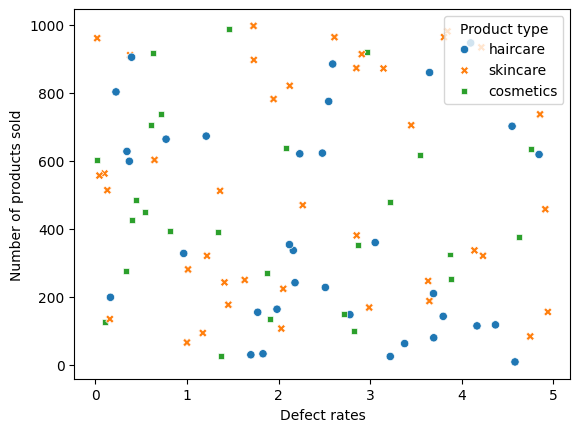

In [56]:
sns.scatterplot(y=df['Number of products sold'], x=df['Defect rates'], hue=df["Product type"], style=df["Product type"])

<Axes: xlabel='Stock levels', ylabel='Revenue generated'>

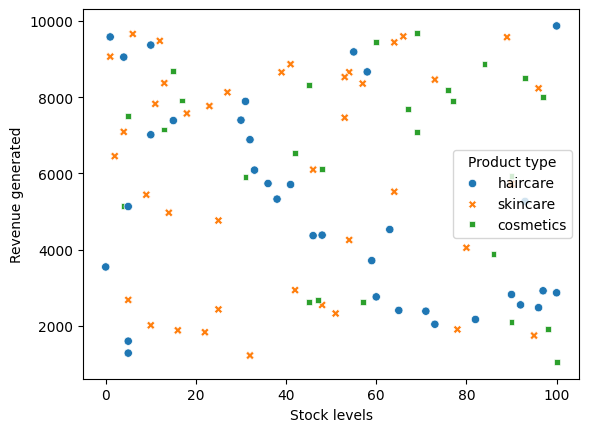

In [58]:
sns.scatterplot(y=df['Revenue generated'], x=df['Stock levels'], hue=df["Product type"], style=df["Product type"])

In [46]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr(method='pearson')
print(correlation_matrix)

                            Price  Availability  Number of products sold  \
Price                    1.000000      0.019083                 0.005739   
Availability             0.019083      1.000000                 0.087496   
Number of products sold  0.005739      0.087496                 1.000000   
Revenue generated        0.038424     -0.075170                -0.001641   
Stock levels             0.078261     -0.025900                 0.022189   
Lead times               0.044855      0.170439                -0.046419   
Order quantities         0.095819      0.143769                 0.015992   
Shipping times           0.071942     -0.051377                 0.087315   
Shipping costs           0.058543     -0.044179                 0.044285   
Lead time                0.152185     -0.156669                 0.041230   
Production volumes      -0.124575      0.050134                 0.187945   
Manufacturing lead time -0.301313      0.065333                -0.048939   
Manufacturin

**CONCLUSION**

can't find highly correlated columns

skincare products are sold more than cosmetics but revenue generated of cosmetics is slightly more than skincare

Manufacturing cost of cosmetics is lowest and rest both products have the same cost